In [1]:
#install required packages
!pip install statsmodels
!pip install regex
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import regex as re 
from datetime import datetime 
import scipy as sp
import statsmodels.api as sm
df = pd.read_csv('com_prices.csv')
df.head()

/tmp/ipykernel_1854/492332740.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960M02,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960M03,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960M04,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960M05,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


Need to fix the month column so that it is in month year format 

Reasons to impute null values with 0.0:

    -CRUDE WTI was not traded back in the 60's.
    
    -Japan did not manufacture natural gas back in 1960.
    
    
    
Data types need to be changed from object to float since several of the commodities prices are strings.
    
    ex:  '---' should be 0.0

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MONTH          761 non-null    object 
 1   CRUDE_PETRO    761 non-null    float64
 2   CRUDE_BRENT    761 non-null    float64
 3   CRUDE_DUBAI    761 non-null    float64
 4   CRUDE_WTI      761 non-null    object 
 5   COAL_AUS       761 non-null    object 
 6   COAL_SAFRICA   761 non-null    object 
 7   NGAS_US        761 non-null    float64
 8   NGAS_EUR       761 non-null    float64
 9   NGAS_JP        761 non-null    object 
 10  iNATGAS        761 non-null    object 
 11  COCOA          761 non-null    float64
 12  COFFEE_ARABIC  761 non-null    float64
 13  COFFEE_ROBUS   761 non-null    float64
 14  TEA_AVG        761 non-null    float64
 15  TEA_COLOMBO    761 non-null    float64
 16  TEA_KOLKATA    761 non-null    float64
 17  TEA_MOMBASA    761 non-null    float64
 18  COCONUT_OI

In [3]:
def to_float(df):
    for i in df.columns:
        if i != 'MONTH':
            df[i] = df[i].replace('...', np.nan)
    for i in df.columns: 
        if i != 'MONTH':
            df[i] = pd.to_numeric(df[i], errors='coerce')
    df.fillna(0.0, inplace = True)

    #use regex to tranform month column to month/year format


    def monthyear(column):
        return re.sub(r'(\d{4})M(\d{2})', r'\2/\1', column)

    df['MONTH'] = df['MONTH'].apply(monthyear)
    df['MONTH'] = pd.to_datetime(df['MONTH'], format = '%m/%Y')
    return df

df = to_float(df)
df.head()

,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960-01-01,1.63,1.63,1.63,0.0,0.0,0.0,0.14,0.404774,0.0,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960-02-01,1.63,1.63,1.63,0.0,0.0,0.0,0.14,0.404774,0.0,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960-03-01,1.63,1.63,1.63,0.0,0.0,0.0,0.14,0.404774,0.0,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960-04-01,1.63,1.63,1.63,0.0,0.0,0.0,0.14,0.404774,0.0,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960-05-01,1.63,1.63,1.63,0.0,0.0,0.0,0.14,0.404774,0.0,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MONTH          761 non-null    datetime64[ns]
 1   CRUDE_PETRO    761 non-null    float64       
 2   CRUDE_BRENT    761 non-null    float64       
 3   CRUDE_DUBAI    761 non-null    float64       
 4   CRUDE_WTI      761 non-null    float64       
 5   COAL_AUS       761 non-null    float64       
 6   COAL_SAFRICA   761 non-null    float64       
 7   NGAS_US        761 non-null    float64       
 8   NGAS_EUR       761 non-null    float64       
 9   NGAS_JP        761 non-null    float64       
 10  iNATGAS        761 non-null    float64       
 11  COCOA          761 non-null    float64       
 12  COFFEE_ARABIC  761 non-null    float64       
 13  COFFEE_ROBUS   761 non-null    float64       
 14  TEA_AVG        761 non-null    float64       
 15  TEA_COLOMBO    761 non-

<Axes: xlabel='MONTH', ylabel='GOLD'>

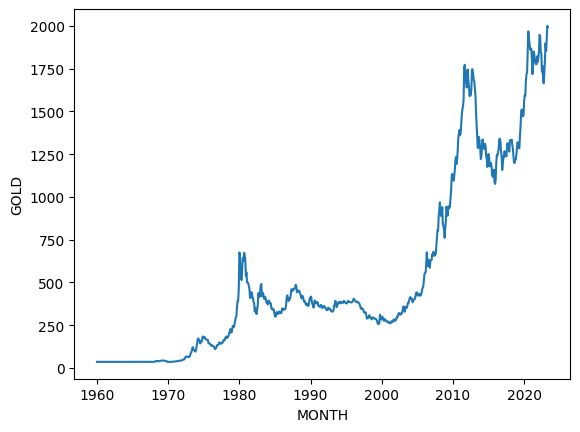

In [6]:
sns.lineplot(data = df, x = 'MONTH', y = 'GOLD')

Observing spot price of gold during 2008 recession and covid pandemic

<Axes: xlabel='MONTH', ylabel='GOLD'>

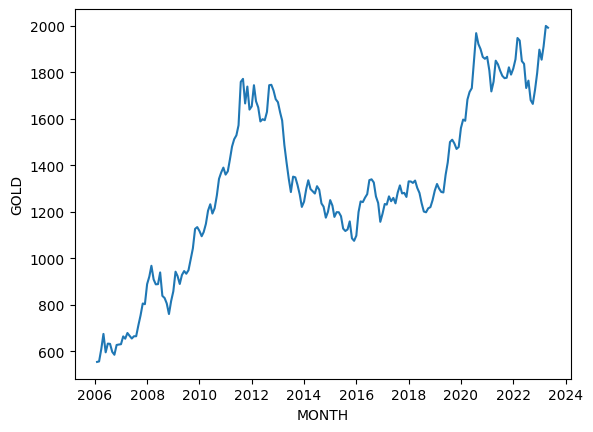

In [37]:
#note how gold price increases as the recession beings in late 2007 and peaks in 2008.

sns.lineplot(data = df[df['MONTH'] > '01-01-2006'], x = 'MONTH', y = 'GOLD') 

<Axes: xlabel='MONTH', ylabel='GOLD'>

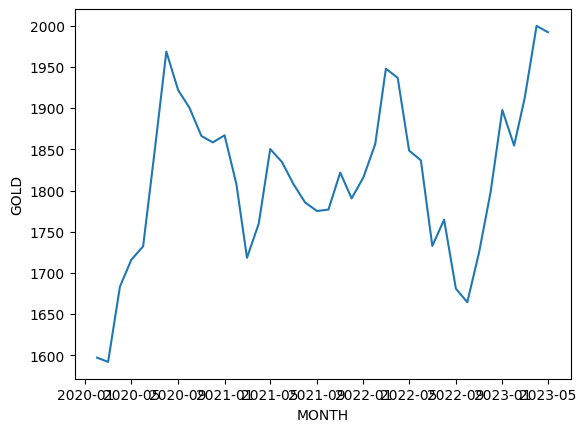

In [7]:
sns.lineplot(data = df[df['MONTH'] > '01-01-2020'], x = 'MONTH', y = 'GOLD') 

Price of gold increased considerably during the lockdown period of the COVID-19 pandemic from around $1600/oz to $2000/oz in less than a year. Further proving that gold is a good portfolio addition to mitigate risk in a portfolio. 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MONTH          761 non-null    datetime64[ns]
 1   CRUDE_PETRO    761 non-null    float64       
 2   CRUDE_BRENT    761 non-null    float64       
 3   CRUDE_DUBAI    761 non-null    float64       
 4   CRUDE_WTI      761 non-null    float64       
 5   COAL_AUS       761 non-null    float64       
 6   COAL_SAFRICA   761 non-null    float64       
 7   NGAS_US        761 non-null    float64       
 8   NGAS_EUR       761 non-null    float64       
 9   NGAS_JP        761 non-null    float64       
 10  iNATGAS        761 non-null    float64       
 11  COCOA          761 non-null    float64       
 12  COFFEE_ARABIC  761 non-null    float64       
 13  COFFEE_ROBUS   761 non-null    float64       
 14  TEA_AVG        761 non-null    float64       
 15  TEA_COLOMBO    761 non-

In [13]:
df_copy = df.copy()

In [18]:
energy = ['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS']

caffeine = ['COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'TOBAC_US']

oils = ['COCONUT_OIL', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL','SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL']

grains = ['COCOA', 'GRNUT', 'SOYBEANS','BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW' ]

food = ['BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD']

industrial = ['LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG']

metals = ['PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc'] 

precious_metals = ['GOLD', 'PLATINUM', 'SILVER']


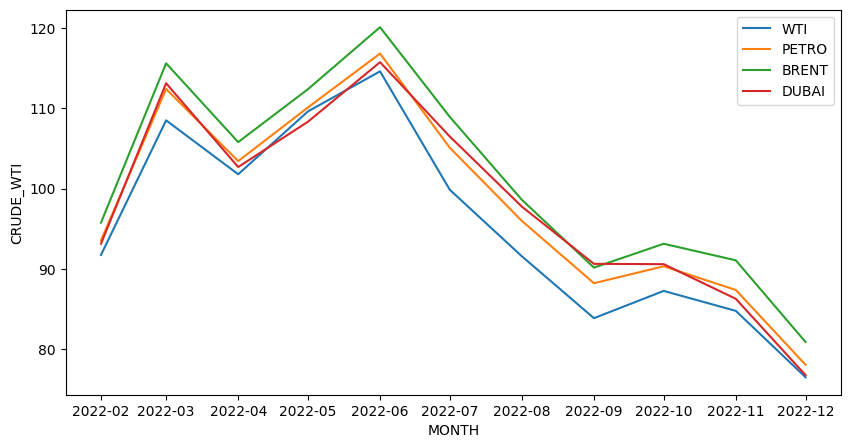

In [95]:
plt.figure(figsize=(10,5))
limited_time = df[df['MONTH'] > '01-01-2022']
df_sorted_wti = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_WTI')
df_sorted_petro = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_PETRO')
df_sorted_brent = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_BRENT')
df_sorted_dubai = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_DUBAI')
sns.lineplot(data = df_sorted_wti, x = 'MONTH', y = 'CRUDE_WTI', label = 'WTI') 
sns.lineplot(data = df_sorted_petro, x = 'MONTH', y = 'CRUDE_PETRO', label = 'PETRO')
sns.lineplot(data = df_sorted_brent, x = 'MONTH', y = 'CRUDE_BRENT', label = 'BRENT')
sns.lineplot(data = df_sorted_dubai, x = 'MONTH', y = 'CRUDE_DUBAI', label = 'DUBAI')
plt.show()

Calculate correlations between commodities 

In [19]:
ecorr = df[energy].corr()
ccorr = df[caffeine].corr()
ocorr = df[oils].corr()
gcorr = df[grains].corr()
fcorr = df[food].corr()
icorr = df[industrial].corr()
mcorr = df[metals].corr()


<Axes: >

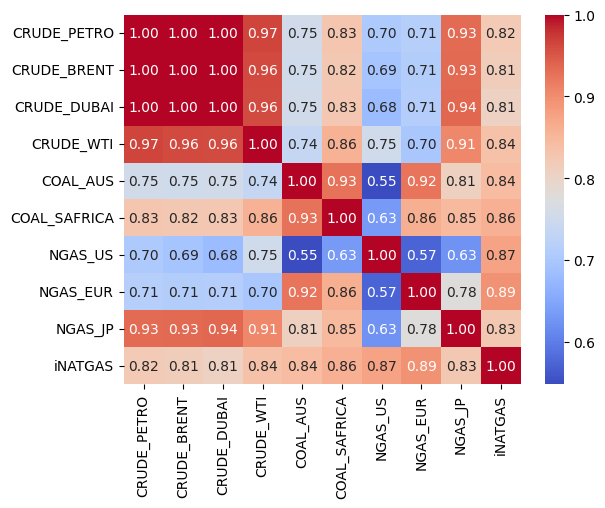

In [20]:
sns.heatmap(ecorr, annot=True, cmap='coolwarm', fmt = '.2f')

Keep brent and dubai beacause they are closer to average price of all crude oil commodities.


Keep brent because it has lower correlation with price of coal.

Keep coal Australia because it had lower correlation with price of international natural gas.

Keep natural gas USA because it has lowest correlation with features that are unrelated to natural gas.  

oil = 'CRUDE_BRENT'
coal = 'COAL_AUS'
ngas = 'NGAS_US', 'iNATGAS'

Need to create a correlation heatmap to observe the correlations between variables after removing repeated commodities.



<Axes: >

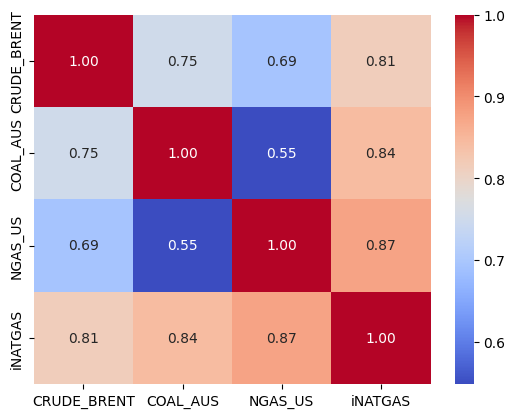

In [35]:
energies = ['CRUDE_BRENT', 'COAL_AUS', 'NGAS_US', 'iNATGAS']
ecorr = df[energies].corr()
sns.heatmap(ecorr, annot=True, cmap='coolwarm', fmt = '.2f')

The feature set to train the model will only include the price of US natural gas; since the international price of natural gas has a high positive correlation with the price of natural gas produced in the USA.

In [28]:
natural_gas = [i for i in energy if 'NGAS' in i]
df[natural_gas].values
for i in df[natural_gas].values:
    print(i.mean())




0.181591332
0.181591332
0.181591332
0.181591332
0.181591332
0.181591332
0.181591332
0.181591332
0.181591332
0.181591332
0.181591332
0.181591332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18492466533333332
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18825799866666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.18378371266666668
0.178049934
0.178049934
0.178049934
0.178049934
0.178049934
0.178049934
0.178049934
0.178049934
0.178049934
0.178049934
0.178049934
0.17

In [27]:
crude = [i for i in energy if 'CRUDE' in i]
for i in df[crude].values:
    print(i.mean())

1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.2225000855
1.1775
1.1775
1.1775
1.1775
1.1775
1.1775
1.1775
1.1775
1.1775
1.1775
1.1775
1.1775
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.1400000000000001
1.125
1.125
1.125
1.125
1.125
1.125
1.125
1.125
1.125
1.125
1.125
1.125
1.0875
1.0875
1.0875
1.0875
1.0875
1.0875
1.0875
1.0875
1.0875
1.0875
1.0875
1.0875
1.065
1.065
1.065
1.065
1.065
1.065
1.065
1.065
1.065
1.065
1.065
1.065
1.02
1.02
1.02
1.02
1.02
1.02
1.02
1.02
1.02
1.02
1.02
1.02
0.9975
0.9975
0.9975
0.9975
0.9975
0.9975
0.9975
0.9975
0.9975
0.9975
0.9975
0.9975
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.99
0.9525
0.9525
0.9525
0.9525
0.9525
0.9525
0.9525
0.9525
0.9525
0.9525
0.9525
0.9525
0.9075
0.9075
0.

<Axes: >

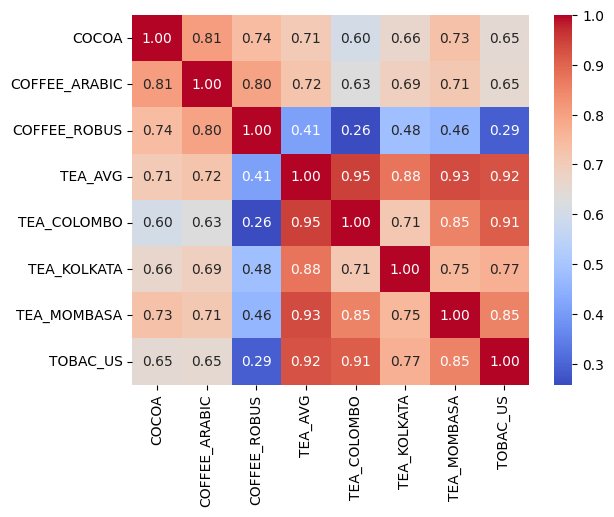

In [12]:
sns.heatmap(ccorr, annot=True, cmap='coolwarm', fmt = '.2f')

<Axes: >

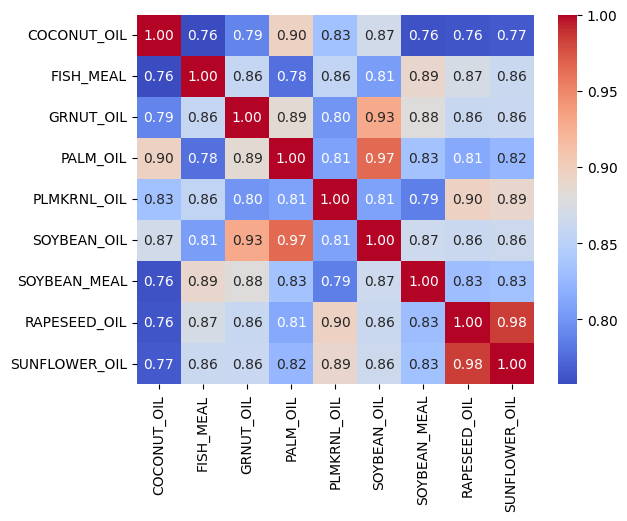

In [29]:
sns.heatmap(ocorr, annot=True, cmap='coolwarm', fmt = '.2f')

Soybean Oil and Palm Oil have 97% positive correlation 

Grapeseed oil and grapeseed oil have 98% positive correlatation

<Axes: >

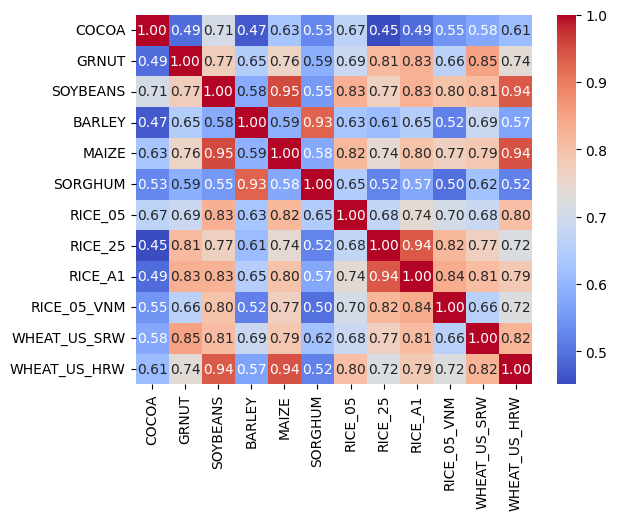

In [30]:
sns.heatmap(gcorr, annot=True, cmap='coolwarm', fmt = '.2f')

<Axes: >

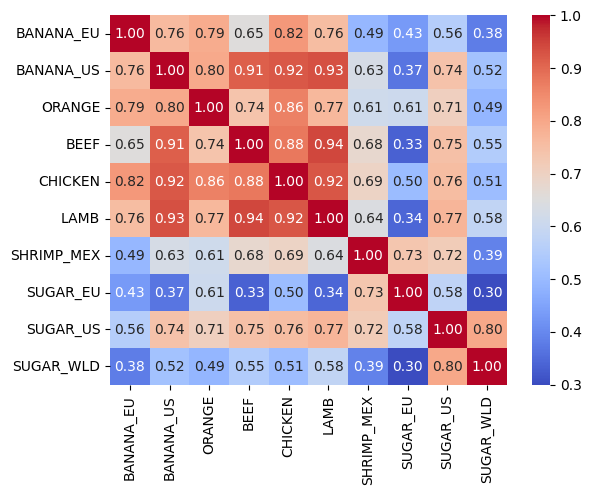

In [31]:
sns.heatmap(fcorr, annot=True, cmap='coolwarm', fmt = '.2f')

<Axes: >

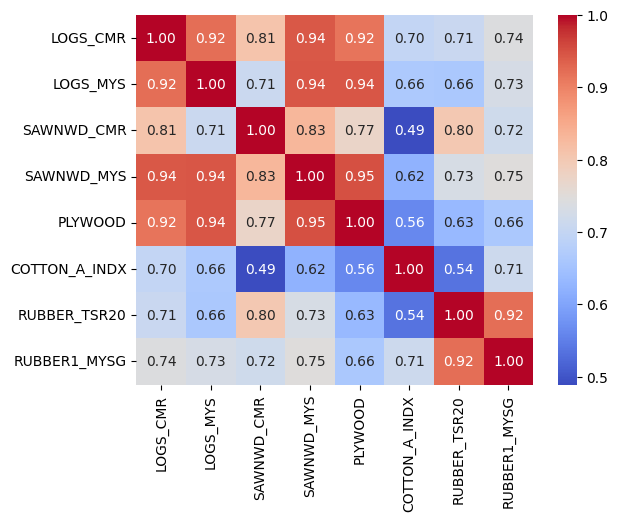

In [32]:
sns.heatmap(icorr, annot=True, cmap='coolwarm', fmt = '.2f')

<Axes: >

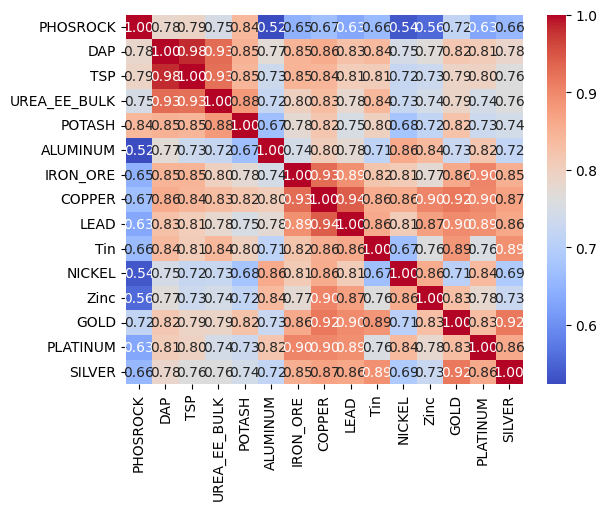

In [33]:
sns.heatmap(mcorr, annot=True, cmap='coolwarm', fmt = '.2f')